# NLP Basics Assessment

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Ohtar10/icesi-nlp/blob/main/Sesion1/6-practice.ipynb)

En este notebook vamos a poner en práctica algunos de los conceptos vistos en los notebooks anteriores, aplicado a un corpus específico:
[_An Occurrence at Owl Creek Bridge_](https://en.wikipedia.org/wiki/An_Occurrence_at_Owl_Creek_Bridge) por Ambrose Bierce (1890). Esta historia es de dominio público y el corpus fue obtenido de [Project Gutenberg](https://www.gutenberg.org/ebooks/375.txt.utf-8).

## Referencias
* [NLP - Natural Language Processing With Python](https://www.udemy.com/course/nlp-natural-language-processing-with-python)
* [Natural Language Processing in Action](https://www.manning.com/books/natural-language-processing-in-action)

In [73]:
import pkg_resources
import warnings

warnings.filterwarnings('ignore')

installed_packages = [package.key for package in pkg_resources.working_set]
IN_COLAB = 'google-colab' in installed_packages

In [74]:
!test '{IN_COLAB}' = 'True' && wget  https://github.com/Ohtar10/icesi-nlp/raw/refs/heads/main/requirements.txt && pip install -r requirements.txt

--2026-02-07 19:30:42--  https://github.com/Ohtar10/icesi-nlp/raw/refs/heads/main/requirements.txt
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Ohtar10/icesi-nlp/refs/heads/main/requirements.txt [following]
--2026-02-07 19:30:42--  https://raw.githubusercontent.com/Ohtar10/icesi-nlp/refs/heads/main/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 349 [text/plain]
Saving to: ‘requirements.txt.1’

requirements.txt.1  100%[===================>]     349  --.-KB/s    in 0s      

2026-02-07 19:30:42 (4.85 MB/s) - ‘requirements.txt.1’ saved [349/349]

  Using cached pandas-2.1.1-cp3

In [75]:
# RUN THIS CELL to perform standard imports:
import spacy
nlp = spacy.load('en_core_web_sm')

**1. Creamos el documento desde el archivo `owlcreek.txt`**<br>
> Pista: Usa `with open('./owlcreek.txt') as f:`

In [76]:
!test '{IN_COLAB}' = 'True' && wget  https://github.com/Ohtar10/icesi-nlp/raw/refs/heads/main/Sesion1/owlcreek.txt

--2026-02-07 19:31:03--  https://github.com/Ohtar10/icesi-nlp/raw/refs/heads/main/Sesion1/owlcreek.txt
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Ohtar10/icesi-nlp/refs/heads/main/Sesion1/owlcreek.txt [following]
--2026-02-07 19:31:03--  https://raw.githubusercontent.com/Ohtar10/icesi-nlp/refs/heads/main/Sesion1/owlcreek.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21344 (21K) [text/plain]
Saving to: ‘owlcreek.txt’

owlcreek.txt        100%[===================>]  20.84K  --.-KB/s    in 0s      

2026-02-07 19:31:04 (99.9 MB/s) - ‘owlcreek.txt’ saved [21344/21344]



In [77]:
with open('./owlcreek.txt') as file:
    doc = nlp(file.read())

In [78]:
doc[:36]

AN OCCURRENCE AT OWL CREEK BRIDGE

by Ambrose Bierce

I

A man stood upon a railroad bridge in northern Alabama, looking down
into the swift water twenty feet below.  

El documento fue cargado exitosamente!

**2. Cuantos tokens hay en el archivo?**

In [79]:
len(doc)

4835

**3. Cuantas oraciones hay en el archivo?**
<br>Pista: Necesitarás una lista primero

In [80]:
sentences = list(doc.sents)
len(sentences)

204

**4. Imprime la segunda oración del documento**
<br> Pista: Los índices comienzan en 0 y el título cuenta como la primera oración.

In [81]:
sentences[1]

The man's hands were behind
his back, the wrists bound with a cord.  

**5. Por cada token en la oración anterior, imprime su `text`, `POS` tag, `dep` tag y `lemma`**
<br>

In [82]:
print("{:20}{:20}{:20}{:20}".format("Text", "POS", "dep", "lemma"))
for token in sentences[1]:
    print(f"{token.text:{20}}{token.pos_:{20}}{token.dep_:{20}}{token.lemma_:{20}}")

Text                POS                 dep                 lemma               
The                 DET                 det                 the                 
man                 NOUN                poss                man                 
's                  PART                case                's                  
hands               NOUN                nsubj               hand                
were                AUX                 ROOT                be                  
behind              ADP                 prep                behind              

                   SPACE               dep                 
                   
his                 PRON                poss                his                 
back                NOUN                pobj                back                
,                   PUNCT               punct               ,                   
the                 DET                 det                 the                 
wrists              NOUN    

**6. Implementa un matcher llamado *Swimming* que encuentre las ocurrencias de la frase *swimming vigorously* Write a matcher called 'Swimming' that finds**
<br>
Pista: Deberías incluir un patrón`'IS_SPACE': True` entre las dos palabras.

In [83]:
from spacy.matcher import Matcher

matcher = Matcher(nlp.vocab)
pattern = [{'LOWER': 'swimming'}, {'IS_SPACE': True}, {'LOWER': 'vigorously'}]
matcher.add("Swimming", [pattern])


In [84]:
found_matches = matcher(doc)
found_matches




[(12881893835109366681, 1274, 1277), (12881893835109366681, 3609, 3612)]

**7. Imprime el texto al rededor de cada match encontrado**

In [85]:
start, end = found_matches[0][1:]
doc[start-9:end+13]

By diving I could evade the bullets and, swimming
vigorously, reach the bank, take to the woods and get away home

In [86]:
start, end = found_matches[1][1:]
doc[start-7:end+5]

over his shoulder; he was now swimming
vigorously with the current.  

**8. Imprime la oración que contiene cada match encontrado**

In [87]:
for sentence in sentences:
    for _, start, end in found_matches:
        if sentence.start <= start and sentence.end >= end:
            print(sentence.text, '\n')

By diving I could evade the bullets and, swimming
vigorously, reach the bank, take to the woods and get away home.   

The hunted man saw all this over his shoulder; he was now swimming
vigorously with the current.   



# práctica

Analizar el párrafo extraído de la página: https://learn.microsoft.com/es-es/azure/architecture/data-guide/technology-choices/natural-language-processing

## 1. Selección del texto

In [88]:
texto = """Tecnología de procesamiento de lenguaje natural
El procesamiento de lenguaje natural tiene muchas aplicaciones, como el análisis de opiniones, la detección de temas, la detección de idioma, la extracción de frases clave y la categorización de documentos.

En concreto, puede usar el procesamiento de lenguaje natural para:

Clasificar documentos. Por ejemplo, puede etiquetarlos como confidenciales o correo no deseado.
Realice búsquedas o procesamientos posteriores mediante salidas de procesamiento de lenguaje natural.
Resumir texto mediante la identificación de entidades en el documento.
Etiquete documentos con palabras clave mediante entidades identificadas.
Realizar búsquedas y recuperación basadas en contenido mediante etiquetas.
Resumir los temas clave de un documento mediante entidades identificadas.
Clasificar documentos para la navegación mediante temas detectados.
Enumerar documentos relacionados basados en un tema seleccionado.
Evalúe la opinión del texto para comprender su tono positivo o negativo."""
doc = nlp(texto)

print("Documento cargado ✅")


Documento cargado ✅


## 2) ¿Cuántos tokens hay?


In [89]:
len(doc)

165

En el texto se encontraron 165 tokens

## 3) ¿Cuántas oraciones hay?

In [90]:
sentences = list(doc.sents)
len(sentences)

12

Hay 12 oraciones

## 4) Imprime la segunda oración (índice 1)

In [91]:
sentences[1].text

'En concreto, puede usar el procesamiento de lenguaje natural para:\n\nClasificar documentos.'

## 5) Por cada token de esa oración: text, POS, dep, lemma

In [103]:
print("{:20}{:20}{:20}{:20}".format("Text", "POS", "dep", "lemma"))
for token in sentences[1]:
    print(f"{token.text:{20}}{token.pos_:{20}}{token.dep_:{20}}{token.lemma_:{20}}")


Text                POS                 dep                 lemma               
En                  PROPN               compound            En                  
concreto            NOUN                nsubj               concreto            
,                   PUNCT               punct               ,                   
puede               NOUN                ROOT                puede               
usar                ADJ                 amod                usar                
el                  PROPN               nmod                el                  
procesamiento       PROPN               compound            procesamiento       
de                  PROPN               nmod                de                  
lenguaje            X                   nmod                lenguaje            
natural             ADJ                 amod                natural             
para                NOUN                npadvmod            para                
:                   PUNCT   

Se tomó la segunda oración del texto procesado con spaCy (sentences[1]) y se realizó un análisis token a token. Para cada token (palabra, puntuación o espacio) se imprimió una tabla con cuatro campos: el texto original (Text), su categoría gramatical (POS), su relación sintáctica dentro de la oración (dep) y su forma base o lema (lemma). Esto permite entender cómo spaCy segmenta la oración y cómo interpreta la función de cada palabra en la estructura gramatical.

In [104]:
print("{:20}{:20}{:20}{:20}".format("Text", "POS", "dep", "lemma"))

for i, sent in enumerate(sentences[:5], start=1):
    print("\n" + "="*80)
    print(f"Oración {i}: {sent.text}")
    print("="*80)

    for token in sent:
        print(f"{token.text:{20}}{token.pos_:{20}}{token.dep_:{20}}{token.lemma_:{20}}")


Text                POS                 dep                 lemma               

Oración 1: Tecnología de procesamiento de lenguaje natural
El procesamiento de lenguaje natural tiene muchas aplicaciones, como el análisis de opiniones, la detección de temas, la detección de idioma, la extracción de frases clave y la categorización de documentos.


Tecnología          PROPN               nmod                Tecnología          
de                  PROPN               nmod                de                  
procesamiento       X                   nmod                procesamiento       
de                  X                   nmod                de                  
lenguaje            NOUN                nmod                lenguaje            
natural             ADJ                 amod                natural             

                   SPACE               dep                 
                   
El                  PROPN               compound            El                  
pr

Adicionalmente, se realizó un análisis token a token sobre las primeras cinco oraciones del documento procesado con spaCy. Para cada oración se imprimió su texto completo y, posteriormente, se listó cada token (palabras, signos de puntuación y espacios) junto con sus atributos lingüísticos principales: Text (token original), POS (categoría gramatical), dep (relación de dependencia sintáctica dentro de la oración) y lemma (forma base). Este resultado permite observar cómo spaCy segmenta el texto en oraciones y tokens, y cómo asigna etiquetas gramaticales y relaciones sintácticas que luego pueden usarse para tareas como reglas con Matcher, extracción de información o análisis del contenido

## 6) Matcher: encontrar la frase “lenguaje natural”


In [105]:
from spacy.matcher import Matcher

matcher = Matcher(nlp.vocab)

# Definir varios patrones
patterns = {
    "LenguajeNatural": [{"LOWER": "lenguaje"}, {"LOWER": "natural"}],
    "ClasificarDocumentos": [{"LOWER": "clasificar"}, {"LOWER": "documentos"}],
    "OpinionTexto": [{"LOWER": "opinión"}, {"LOWER": "del"}, {"LOWER": "texto"}],
}

# Agregar al matcher (cada label recibe una lista de patrones)
for label, pattern in patterns.items():
    matcher.add(label, [pattern])

# Ejecutar matcher
found_matches = matcher(doc)
print("matches encontrados:", len(found_matches))

# Imprimir matches
for match_id, start, end in found_matches:
    label = nlp.vocab.strings[match_id]
    print(label, "->", doc[start:end].text)


matches encontrados: 7
LenguajeNatural -> lenguaje natural
LenguajeNatural -> lenguaje natural
LenguajeNatural -> lenguaje natural
ClasificarDocumentos -> Clasificar documentos
LenguajeNatural -> lenguaje natural
ClasificarDocumentos -> Clasificar documentos
OpinionTexto -> opinión del texto


Se utilizó spaCy Matcher para identificar frases específicas dentro del texto. Primero se creó un objeto Matcher(nlp.vocab) y luego se definieron patrones basados en el atributo LOWER para reconocer las secuencias: “lenguaje natural”, “clasificar documentos” y “opinión del texto”. Cada patrón se registró en el matcher con una etiqueta (por ejemplo, LenguajeNatural). Después se ejecutó matcher(doc) para obtener todas las coincidencias encontradas y se imprimió el total de matches junto con el label y el texto exacto detectado en cada caso

## 7) Imprime el texto alrededor de cada match (ventana de contexto)

In [106]:
for match_id, start, end in found_matches:
    span = doc[start:end]
    left = max(0, start - 6)
    right = min(len(doc), end + 6)
    print("MATCH:", span.text)
    print("CONTEXTO:", doc[left:right].text)
    print("-" * 60)


MATCH: lenguaje natural
CONTEXTO: Tecnología de procesamiento de lenguaje natural
El procesamiento de lenguaje natural
------------------------------------------------------------
MATCH: lenguaje natural
CONTEXTO: lenguaje natural
El procesamiento de lenguaje natural tiene muchas aplicaciones, como el
------------------------------------------------------------
MATCH: lenguaje natural
CONTEXTO: , puede usar el procesamiento de lenguaje natural para:

Clasificar documentos.
------------------------------------------------------------
MATCH: Clasificar documentos
CONTEXTO: de lenguaje natural para:

Clasificar documentos. Por ejemplo, puede etiquetarlos
------------------------------------------------------------
MATCH: lenguaje natural
CONTEXTO: posteriores mediante salidas de procesamiento de lenguaje natural.
Resumir texto mediante la
------------------------------------------------------------
MATCH: Clasificar documentos
CONTEXTO: documento mediante entidades identificadas.
Clasific

Se recorrieron todos los matches detectados por el Matcher y, para cada uno, se construyó un span con el texto exacto encontrado (doc[start:end]). Luego se calculó una ventana de contexto tomando hasta 6 tokens antes y 6 tokens después del match (left = start-6, right = end+6, con límites del documento). Finalmente, se imprimió el MATCH y su CONTEXTO para ver en qué parte del texto aparece cada coincidencia y confirmar que el patrón se está detectando correctamente

## 8) Imprime la oración que contiene cada match

In [95]:
for sentence in sentences:
    for _, start, end in found_matches:
        if sentence.start <= start and sentence.end >= end:
            print(sentence.text, "\n")


Tecnología de procesamiento de lenguaje natural
El procesamiento de lenguaje natural tiene muchas aplicaciones, como el análisis de opiniones, la detección de temas, la detección de idioma, la extracción de frases clave y la categorización de documentos.

 

Tecnología de procesamiento de lenguaje natural
El procesamiento de lenguaje natural tiene muchas aplicaciones, como el análisis de opiniones, la detección de temas, la detección de idioma, la extracción de frases clave y la categorización de documentos.

 

En concreto, puede usar el procesamiento de lenguaje natural para:

Clasificar documentos. 

En concreto, puede usar el procesamiento de lenguaje natural para:

Clasificar documentos. 

Realice búsquedas o procesamientos posteriores mediante salidas de procesamiento de lenguaje natural.
 

Clasificar documentos para la navegación mediante temas detectados.
 

Evalúe la opinión del texto para comprender su tono positivo o negativo. 



Se identificó la oración completa que contiene cada match. Para ello, se recorrieron las oraciones detectadas por spaCy (sentences) y, por cada coincidencia en found_matches, se verificó si el rango del match (start, end) cae dentro del rango de la oración (sentence.start y sentence.end). Cuando se cumple la condición, se imprime sentence.text. Esto permite ver cada match dentro de su contexto oracional, confirmando dónde aparece en el texto y evitando mostrar solo fragmentos

## 9. Resumen de resultados

In [111]:
print("matches:", len(found_matches))
print("tokens:", len(doc))
print("oraciones:", len(sentences))

matches: 7
tokens: 165
oraciones: 12


In [109]:
from collections import Counter

# Lista de spans matched (frases)
phrases = [doc[start:end].text.lower() for _, start, end in found_matches]

freq = Counter(phrases)
freq



Counter({'lenguaje natural': 4,
         'clasificar documentos': 2,
         'opinión del texto': 1})

Se cuantificó cuántas veces aparece cada frase detectada por el Matcher. Para esto, se creó una lista phrases con el texto de cada match (doc[start:end].text) convertido a minúsculas y luego se aplicó Counter para obtener la frecuencia por frase. El resultado muestra el número de ocurrencias de cada patrón en el documento (por ejemplo: “lenguaje natural” 4 veces, “clasificar documentos” 2 veces y “opinión del texto” 1 vez)

In [112]:
from collections import Counter

words = []
for _, start, end in found_matches:
    span = doc[start:end]
    for tok in span:
        if not tok.is_punct and not tok.is_space:
            words.append(tok.lemma_.lower())  # o tok.text.lower()

freq_words = Counter(words)
freq_words


Counter({'lenguaje': 4,
         'natural': 4,
         'clasificar': 2,
         'documento': 2,
         'opinión': 1,
         'del': 1,
         'texto': 1})

Se extrajeron las palabras que componen los matches y se calculó su frecuencia. Para ello, se recorrieron todos los matches (found_matches), se tomó el span correspondiente (doc[start:end]) y se iteró por sus tokens, ignorando puntuación y espacios. Cada token se agregó a una lista en su forma normalizada (lemma en minúscula: tok.lemma_.lower()), y luego se aplicó Counter para obtener cuántas veces aparece cada palabra dentro de todas las coincidencias. Esto permite ver qué términos son más recurrentes en los patrones detectados (por ejemplo, “lenguaje” y “natural” con 4 apariciones)

## 10. Visualización

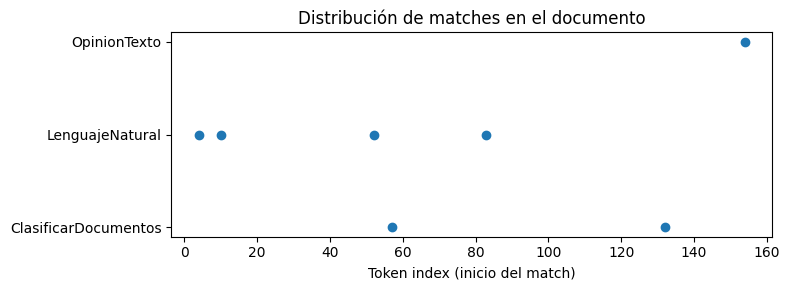

In [99]:
import matplotlib.pyplot as plt

x = []
y = []
labels = []

# mapa label->id para eje Y
unique_labels = sorted({nlp.vocab.strings[m] for m, s, e in found_matches})
lab2y = {lab:i for i, lab in enumerate(unique_labels)}

for match_id, start, end in found_matches:
    lab = nlp.vocab.strings[match_id]
    x.append(start)        # token index de inicio
    y.append(lab2y[lab])

plt.figure(figsize=(8, 3))
plt.scatter(x, y)
plt.yticks(range(len(unique_labels)), unique_labels)
plt.xlabel("Token index (inicio del match)")
plt.title("Distribución de matches en el documento")
plt.tight_layout()
plt.show()


Se graficó la ubicación de cada match dentro del documento usando un diagrama de dispersión (scatter plot). Primero se obtuvieron las etiquetas únicas de los patrones encontrados (por ejemplo, LenguajeNatural, ClasificarDocumentos, OpinionTexto) y se asignó a cada una un valor numérico para el eje Y. Luego, para cada match, se tomó el índice del token donde inicia (start) como coordenada en el eje X y la etiqueta correspondiente como coordenada en Y. El resultado permite ver en qué posiciones del texto aparece cada patrón y comparar su distribución a lo largo del documento

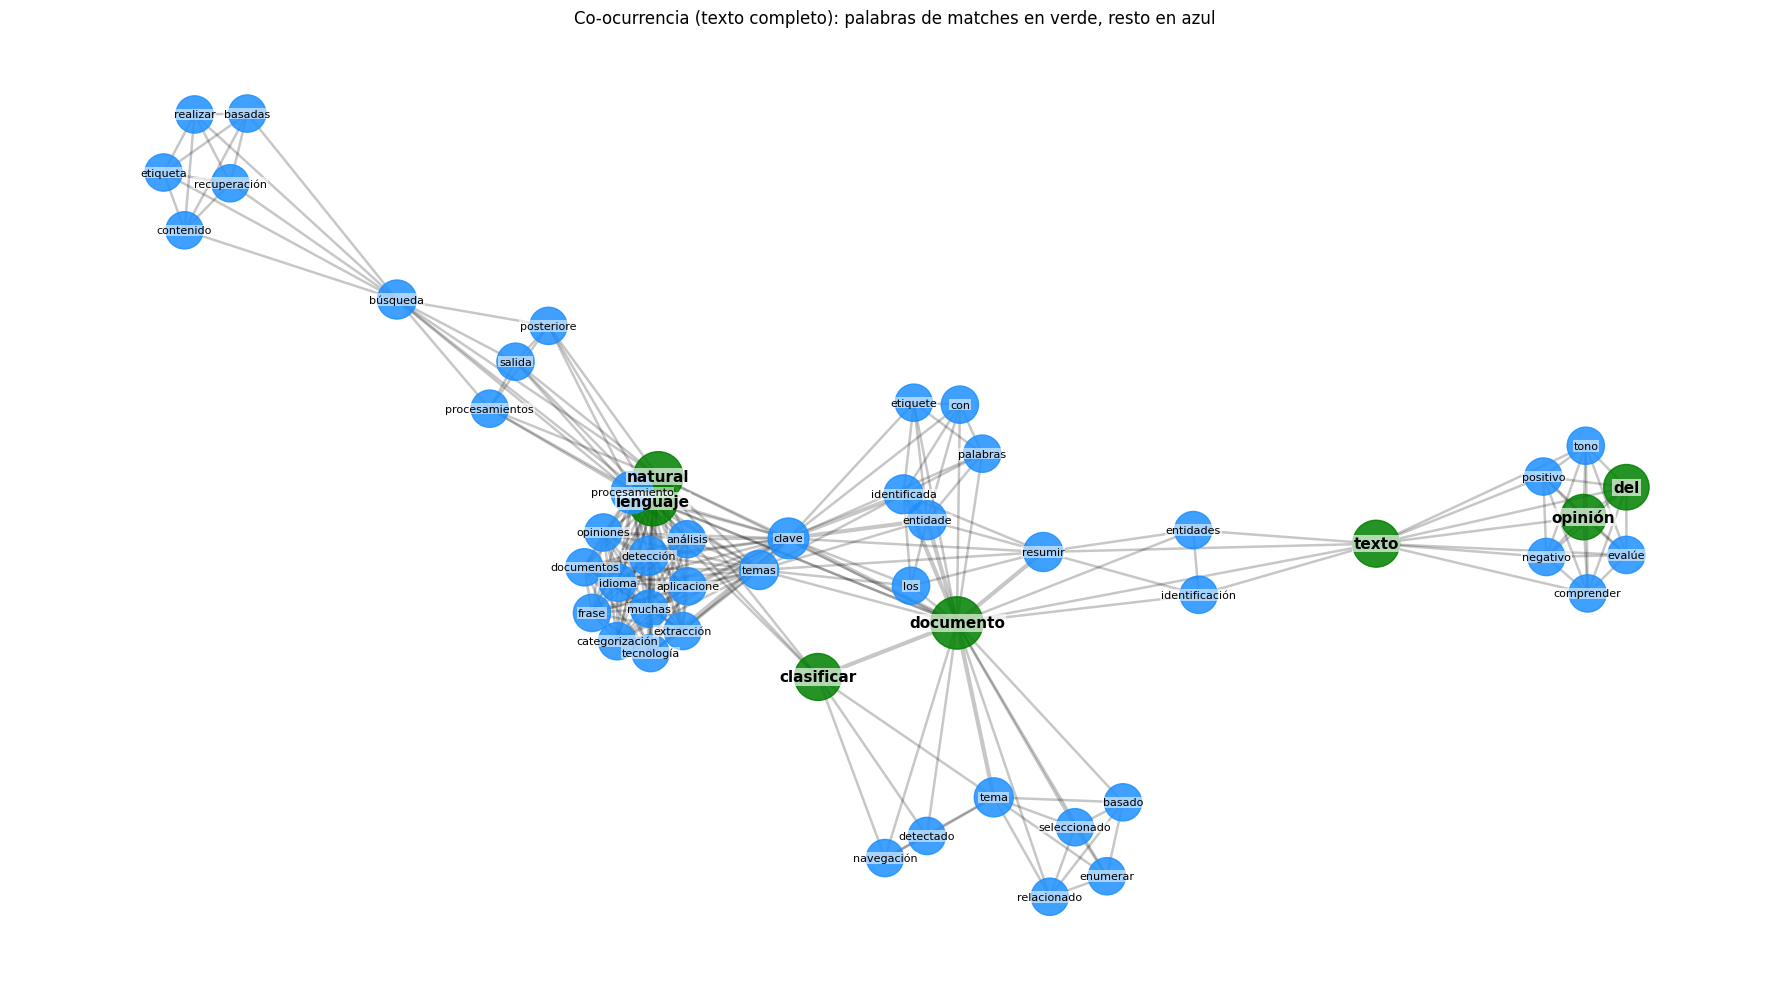

match_words (verdes): {'lenguaje', 'clasificar', 'texto', 'opinión', 'natural', 'documento', 'del'}
Nodos: 51 | Aristas: 255


In [ ]:
# !pip -q install networkx

import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations

sentences = list(doc.sents)

def norm(tok):
    return tok.lemma_.lower()

# -------------------------
# AJUSTES
# -------------------------
TOP_WORDS = 60        # más alto = más nodos azules
MIN_W = 1             # en textos cortos déjalo en 1
KEEP_ONLY_MAIN_COMPONENT = True  
# Stopwords extra (ruido típico en este texto)
CUSTOM_STOP = {
    "como", "puede", "para", "por", "mediante", "realice", "tiene", "usar",
    "concreto", "posterior", "posteriores"
}

def is_valid(tok):
    if tok.is_punct or tok.is_space:
        return False
    if tok.is_stop:
        return False
    w = norm(tok)
    if len(w) < 3:
        return False
    if w in CUSTOM_STOP:
        return False
    return True

# 1) Palabras dentro de ANY match (verde)  
match_words = set()
for match_id, start, end in found_matches:
    for tok in doc[start:end]:
        if not is_valid(tok):     # <-- aquí se filtran stopwords y custom stop
            continue
        match_words.add(norm(tok))

# 2) Frecuencia de palabras (para tamaño de nodos)
content = [norm(tok) for tok in doc if is_valid(tok)]
freq = Counter(content)

# 3) Grafo de co-ocurrencia por ORACIÓN
G = nx.Graph()
for sent in sentences:
    ws = [norm(tok) for tok in sent if is_valid(tok)]
    ws = sorted(set(ws))
    for a, b in combinations(ws, 2):
        if G.has_edge(a, b):
            G[a][b]["weight"] += 1
        else:
            G.add_edge(a, b, weight=1)

# 4) Subgrafo con top palabras + match_words
keep = set([w for w, _ in freq.most_common(TOP_WORDS)]) | match_words
H = G.subgraph(keep).copy()

# quitar aristas débiles
for u, v, d in list(H.edges(data=True)):
    if d["weight"] < MIN_W:
        H.remove_edge(u, v)

# quitar nodos aislados que no sean match
for n in list(H.nodes()):
    if H.degree(n) == 0 and n not in match_words:
        H.remove_node(n)

# 5) Quitar componentes pequeños 
if KEEP_ONLY_MAIN_COMPONENT and H.number_of_nodes() > 0:
    comps = list(nx.connected_components(H))
    largest = max(comps, key=len)
    H = H.subgraph(largest).copy()

# 6) Layout (más separación para que no se monte)
pos = nx.spring_layout(H, seed=42, k=1.05, iterations=350)

# 7) Colores, tamaños, aristas
node_colors = ["green" if n in match_words else "dodgerblue" for n in H.nodes()]

node_sizes = []
for n in H.nodes():
    s = 650 + 70 * min(freq.get(n, 1), 15)
    if n in match_words:
        s += 350
    node_sizes.append(s)

edge_widths = [0.6 + 1.2 * H[u][v]["weight"] for u, v in H.edges()]

# 8) Dibujar
plt.figure(figsize=(18, 10))
nx.draw_networkx_nodes(H, pos, node_color=node_colors, node_size=node_sizes, alpha=0.85)

nx.draw_networkx_edges(
    H, pos,
    width=edge_widths,
    alpha=0.22,
    connectionstyle="arc3,rad=0.12"
)

# Etiquetas: todas (verdes grandes, azules pequeñas) con fondo blanco
nx.draw_networkx_labels(
    H, pos,
    labels={n: n for n in H.nodes() if n in match_words},
    font_size=11,
    font_weight="bold",
    bbox=dict(facecolor="white", alpha=0.65, edgecolor="none", pad=0.8)
)

nx.draw_networkx_labels(
    H, pos,
    labels={n: n for n in H.nodes() if n not in match_words},
    font_size=8,
    bbox=dict(facecolor="white", alpha=0.55, edgecolor="none", pad=0.6)
)

plt.title("Co-ocurrencia (texto completo): palabras de matches en verde, resto en azul")
plt.axis("off")
plt.tight_layout()
plt.show()

print("match_words (verdes):", match_words)
print("Nodos:", H.number_of_nodes(), "| Aristas:", H.number_of_edges())


Gráfico de Co-ocurrencia

- match_words (verde): son las palabras que aparecen dentro de los spans detectados por el Matcher (lenguaje, natural, clasificar, documento, opinión, texto, del).

- Nodos = 51: 51 términos del texto incluidos en el análisis (palabras únicas).

- Aristas = 255: 255 conexiones de co-ocurrencia; dos palabras se conectan si aparecen en la misma oración.

Los verdes funcionan como “anclas” y muestran con qué palabras del texto (azules) se relacionan según el contexto oracional